# Compare Weights of Meta-AE and AE

In [2]:
import arrow
import numpy as np
import os
import pickle
import torch
from torch.nn import Module, Linear, Sequential, ReLU
from torch.nn.functional import mse_loss
from torch.optim import Adam, SGD
from torch.utils.data import TensorDataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
%run -i ./scripts/setConfigs.py

Set configs..


In [5]:
%run -i ./scripts/ReadSimpleAE_MetaModel.py

Load Meta Model AE..
/home/torge/dev/masterthesis_code/02_Experimente/MetaLearning/models/model_bib/20200319_firstMetaModel.pt
SimpleAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=17, out_features=12, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=12, out_features=8, bias=True)
    (3): Tanh()
  )
  (decoder): Sequential(
    (0): Linear(in_features=8, out_features=12, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=12, out_features=17, bias=True)
    (3): Tanh()
  )
)


In [6]:
%run -i ./scripts/ReadSimpleAE_w_weights.py

Load trained simple AE..
/home/torge/dev/masterthesis_code/02_Experimente/MetaLearning/models/model_bib/20200302_firstAE_model.pt
SimpleAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=17, out_features=12, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=12, out_features=8, bias=True)
    (3): Tanh()
  )
  (decoder): Sequential(
    (0): Linear(in_features=8, out_features=12, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=12, out_features=17, bias=True)
    (3): Tanh()
  )
)
Load weights..


In [7]:
type(meta_model)

models.SimpleAutoEncoder.SimpleAutoEncoder

In [8]:
type(model)

models.SimpleAutoEncoder.SimpleAutoEncoder

In [16]:
weights_meta_model = {
    'encoder_l0': meta_model.encoder[0].weight.detach().numpy().T,
    'encoder_l1': meta_model.encoder[2].weight.detach().numpy().T,
    'decoder_l0': meta_model.decoder[0].weight.detach().numpy(),
    'decoder_l1': meta_model.decoder[2].weight.detach().numpy()
}

In [17]:
weights_model = {
    'encoder_l0': model.encoder[0].weight.detach().numpy().T,
    'encoder_l1': model.encoder[2].weight.detach().numpy().T,
    'decoder_l0': model.decoder[0].weight.detach().numpy(),
    'decoder_l1': model.decoder[2].weight.detach().numpy()
}

In [18]:
weight_diffs = {
    'diff_encoder_l0': weights_meta_model['encoder_l0'] - weights_model['encoder_l0'],
    'diff_encoder_l1': weights_meta_model['encoder_l1'] - weights_model['encoder_l1'],
    'diff_decoder_l0': weights_meta_model['decoder_l0'] - weights_model['decoder_l0'],
    'diff_decoder_l1': weights_meta_model['decoder_l1'] - weights_model['decoder_l1']
}

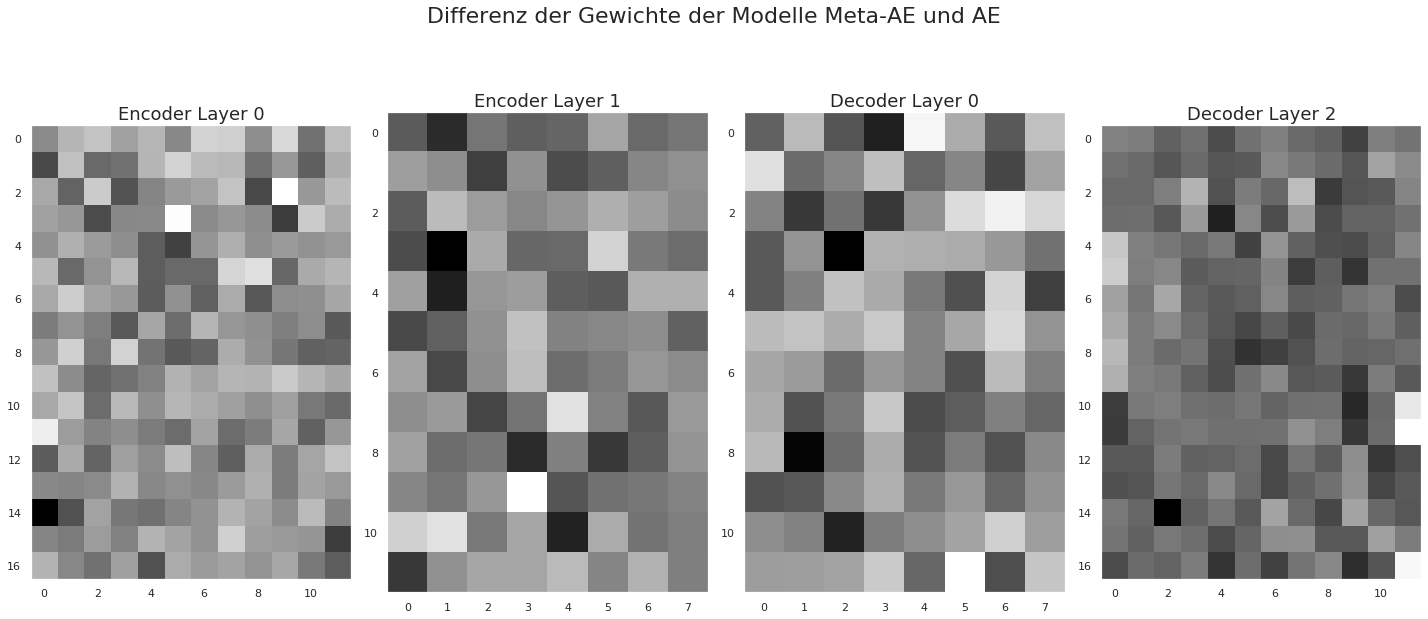

In [22]:
fig, ax = plt.subplots(ncols=4, nrows=1)
fig.set_size_inches(20, 10)

ax[0].imshow(weight_diffs['diff_encoder_l0'], cmap="gray")
ax[0].grid(False)
ax[0].set_title('Encoder Layer 0', fontsize=18)

ax[1].imshow(weight_diffs['diff_encoder_l1'], cmap="gray")
ax[1].grid(False)
ax[1].set_title('Encoder Layer 1', fontsize=18)

ax[2].imshow(weight_diffs['diff_decoder_l0'], cmap="gray")
ax[2].grid(False)
ax[2].set_title('Decoder Layer 0', fontsize=18)

ax[3].imshow(weight_diffs['diff_decoder_l1'], cmap="gray")
ax[3].grid(False)
ax[3].set_title('Decoder Layer 2', fontsize=18)
fig.suptitle('Differenz der Gewichte der Modelle Meta-AE und AE', fontsize=22)
plt.tight_layout()

save = True
if save:
    fn = os.path.join(fig_path, 'weight_diff_of_both_AE.pdf')
    fig.savefig(fn, bbox_inches='tight', pad_inches=0)